In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [3]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')  # make sure the file name matches
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# First 5 rows
print(df.head())

# Shape of the dataset
print("\nShape:", df.shape)

# Column data types and nulls
print("\nInfo:")
df.info()

# Null values
print("\nMissing values:")
print(df.isnull().sum())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Shape: (200, 5)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Missing values:
CustomerID     

In [7]:
print(df.columns.tolist())



['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [8]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()


In [9]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values


In [10]:
#renaming for simplicity
df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'Score'
}, inplace=True)

X = df[['Income', 'Score']].values


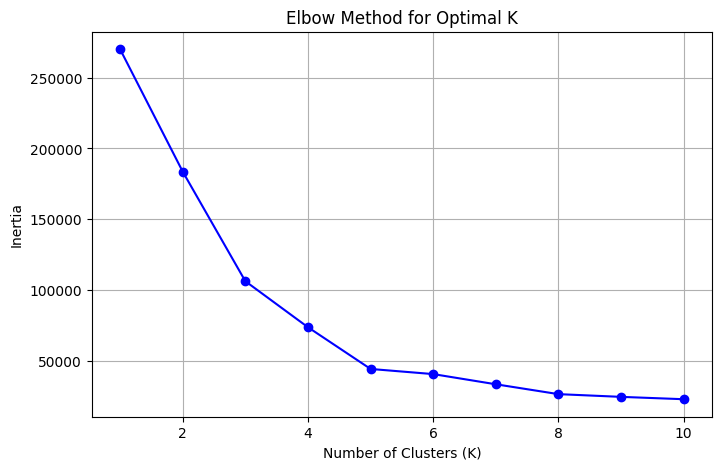

In [11]:
#Elbow Method to Find Optimal K
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()


In [12]:
#Apply K-Means with Optimal K
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Add cluster labels to original DataFrame
df['Cluster'] = labels


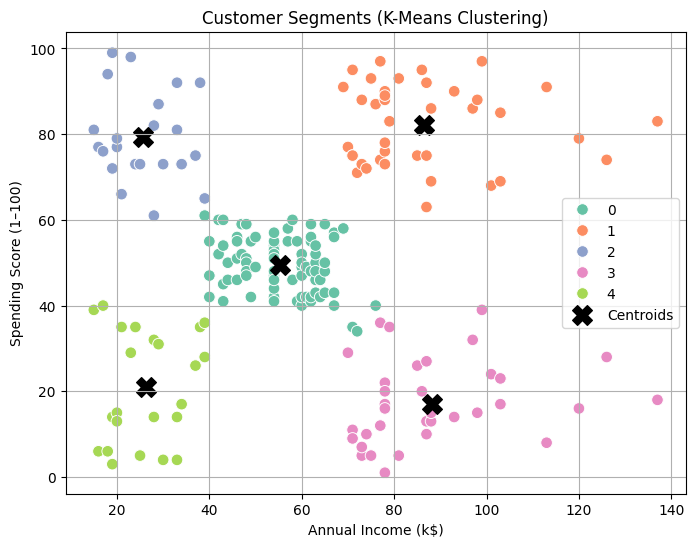

In [13]:
#clusters visualization
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set2', s=70)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')
plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
#silhouette score
from sklearn.metrics import silhouette_score

score = silhouette_score(X, labels)
print("Silhouette Score:", round(score, 3))


Silhouette Score: 0.554
